# Luxury Watch

**Column Details**
* Brand: The brand of the watch.
* Model: The model name or number of the watch.
* Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).
* Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).
* Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).
* Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).
* Case Diameter (mm): The diameter of the watch case in millimeters.
* Case Thickness (mm): The thickness of the watch case in millimeters.
* Band Width (mm): The width of the watch strap or bracelet in millimeters.
* Dial Color: The color of the watch dial (e.g., black, blue, silver).
* Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).
* Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).
* Power Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).
* Price (USD): The retail price of the watch in US dollars.

In [254]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Luxurywatch.csv"

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [256]:
df = pd.read_csv(path)

df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [257]:
df.iloc[24]

Brand                  Bell & Ross
Model                     BR 03-92
Case Material              Ceramic
Strap Material              Rubber
Movement Type            Automatic
Water Resistance        100 meters
Case Diameter (mm)            42.0
Case Thickness (mm)            9.3
Band Width (mm)               22.0
Dial Color                   Black
Crystal Material          Sapphire
Complications                  NaN
Power Reserve                4,200
Price (USD)                    NaN
Name: 24, dtype: object

In [258]:
df.isna().sum()

Brand                    0
Model                    0
Case Material            0
Strap Material           0
Movement Type            0
Water Resistance         0
Case Diameter (mm)       0
Case Thickness (mm)      0
Band Width (mm)          0
Dial Color               0
Crystal Material         0
Complications          122
Power Reserve           14
Price (USD)              1
dtype: int64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [260]:
colum_categoriche = ['Case Material', 'Strap Material',
                     'Movement Type', 'Complications', 'Dial Color', 'Crystal Material']

for x in colum_categoriche:
    df[x] = df[x].astype('category').cat.codes

df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,13,11,0,300 meters,40.0,13.00,20.0,0,3,4,48 hours,"9,500"
1,Omega,Seamaster,14,9,0,600 meters,43.5,14.47,21.0,1,3,4,60 hours,"5,800"
2,Tag Heuer,Carrera,13,5,0,100 meters,41.0,13.00,20.0,6,3,0,42 hours,"4,200"
3,Breitling,Navitimer,13,11,0,30 meters,43.0,14.25,22.0,0,3,0,70 hours,"7,900"
4,Cartier,Tank Solo,13,5,3,30 meters,31.0,6.05,20.0,5,3,-1,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,4,5,0,30 meters,38.5,8.25,20.0,6,3,4,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,13,2,0,300 meters,45.0,15.50,23.0,0,3,4,120 hours,"13,500"
504,Longines,Master Collection,13,5,0,30 meters,38.5,9.70,20.0,1,3,4,64 hours,"1,800"
505,Vacheron Constantin,Overseas,13,11,0,150 meters,41.5,11.00,22.0,1,3,4,40 hours,"19,000"


In [261]:
df['Water Resistance'] = df['Water Resistance'].str.replace(' meters', '')

# so che è molto brutto :-(
df['Power Reserve'] = df['Power Reserve'].str.replace(' hours', '').str.replace(' days', '').str.replace('4,', '')

df['Price (USD)'] = df['Price (USD)'].str.replace(',', '')

df['Water Resistance'] = pd.to_numeric(df['Water Resistance'])
df['Power Reserve'] = pd.to_numeric(df['Power Reserve']) 
df['Price (USD)'] = pd.to_numeric(df['Price (USD)']) 

df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,13,11,0,300,40.0,13.00,20.0,0,3,4,48.0,9500.0
1,Omega,Seamaster,14,9,0,600,43.5,14.47,21.0,1,3,4,60.0,5800.0
2,Tag Heuer,Carrera,13,5,0,100,41.0,13.00,20.0,6,3,0,42.0,4200.0
3,Breitling,Navitimer,13,11,0,30,43.0,14.25,22.0,0,3,0,70.0,7900.0
4,Cartier,Tank Solo,13,5,3,30,31.0,6.05,20.0,5,3,-1,NaN,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,4,5,0,30,38.5,8.25,20.0,6,3,4,38.0,21500.0
503,Blancpain,Fifty Fathoms,13,2,0,300,45.0,15.50,23.0,0,3,4,120.0,13500.0
504,Longines,Master Collection,13,5,0,30,38.5,9.70,20.0,1,3,4,64.0,1800.0
505,Vacheron Constantin,Overseas,13,11,0,150,41.5,11.00,22.0,1,3,4,40.0,19000.0


In [262]:
df['Complications'] = df['Complications'].fillna(df['Complications'].mode())
df['Power Reserve'] = df['Power Reserve'].fillna(df['Power Reserve'].mode())

In [263]:
df.isna().sum()

Brand                   0
Model                   0
Case Material           0
Strap Material          0
Movement Type           0
Water Resistance        0
Case Diameter (mm)      0
Case Thickness (mm)     0
Band Width (mm)         0
Dial Color              0
Crystal Material        0
Complications           0
Power Reserve          14
Price (USD)             1
dtype: int64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    int8   
 3   Strap Material       507 non-null    int8   
 4   Movement Type        507 non-null    int8   
 5   Water Resistance     507 non-null    int64  
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    int8   
 10  Crystal Material     507 non-null    int8   
 11  Complications        507 non-null    int8   
 12  Power Reserve        493 non-null    float64
 13  Price (USD)          506 non-null    float64
dtypes: float64(5), int64(1), int8(6), object(2)
memory usage: 34.8+ KB


<Axes: >

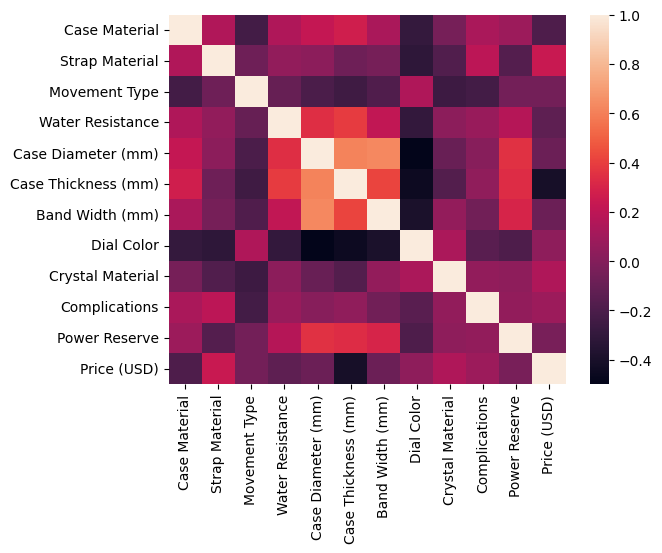

In [265]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr)

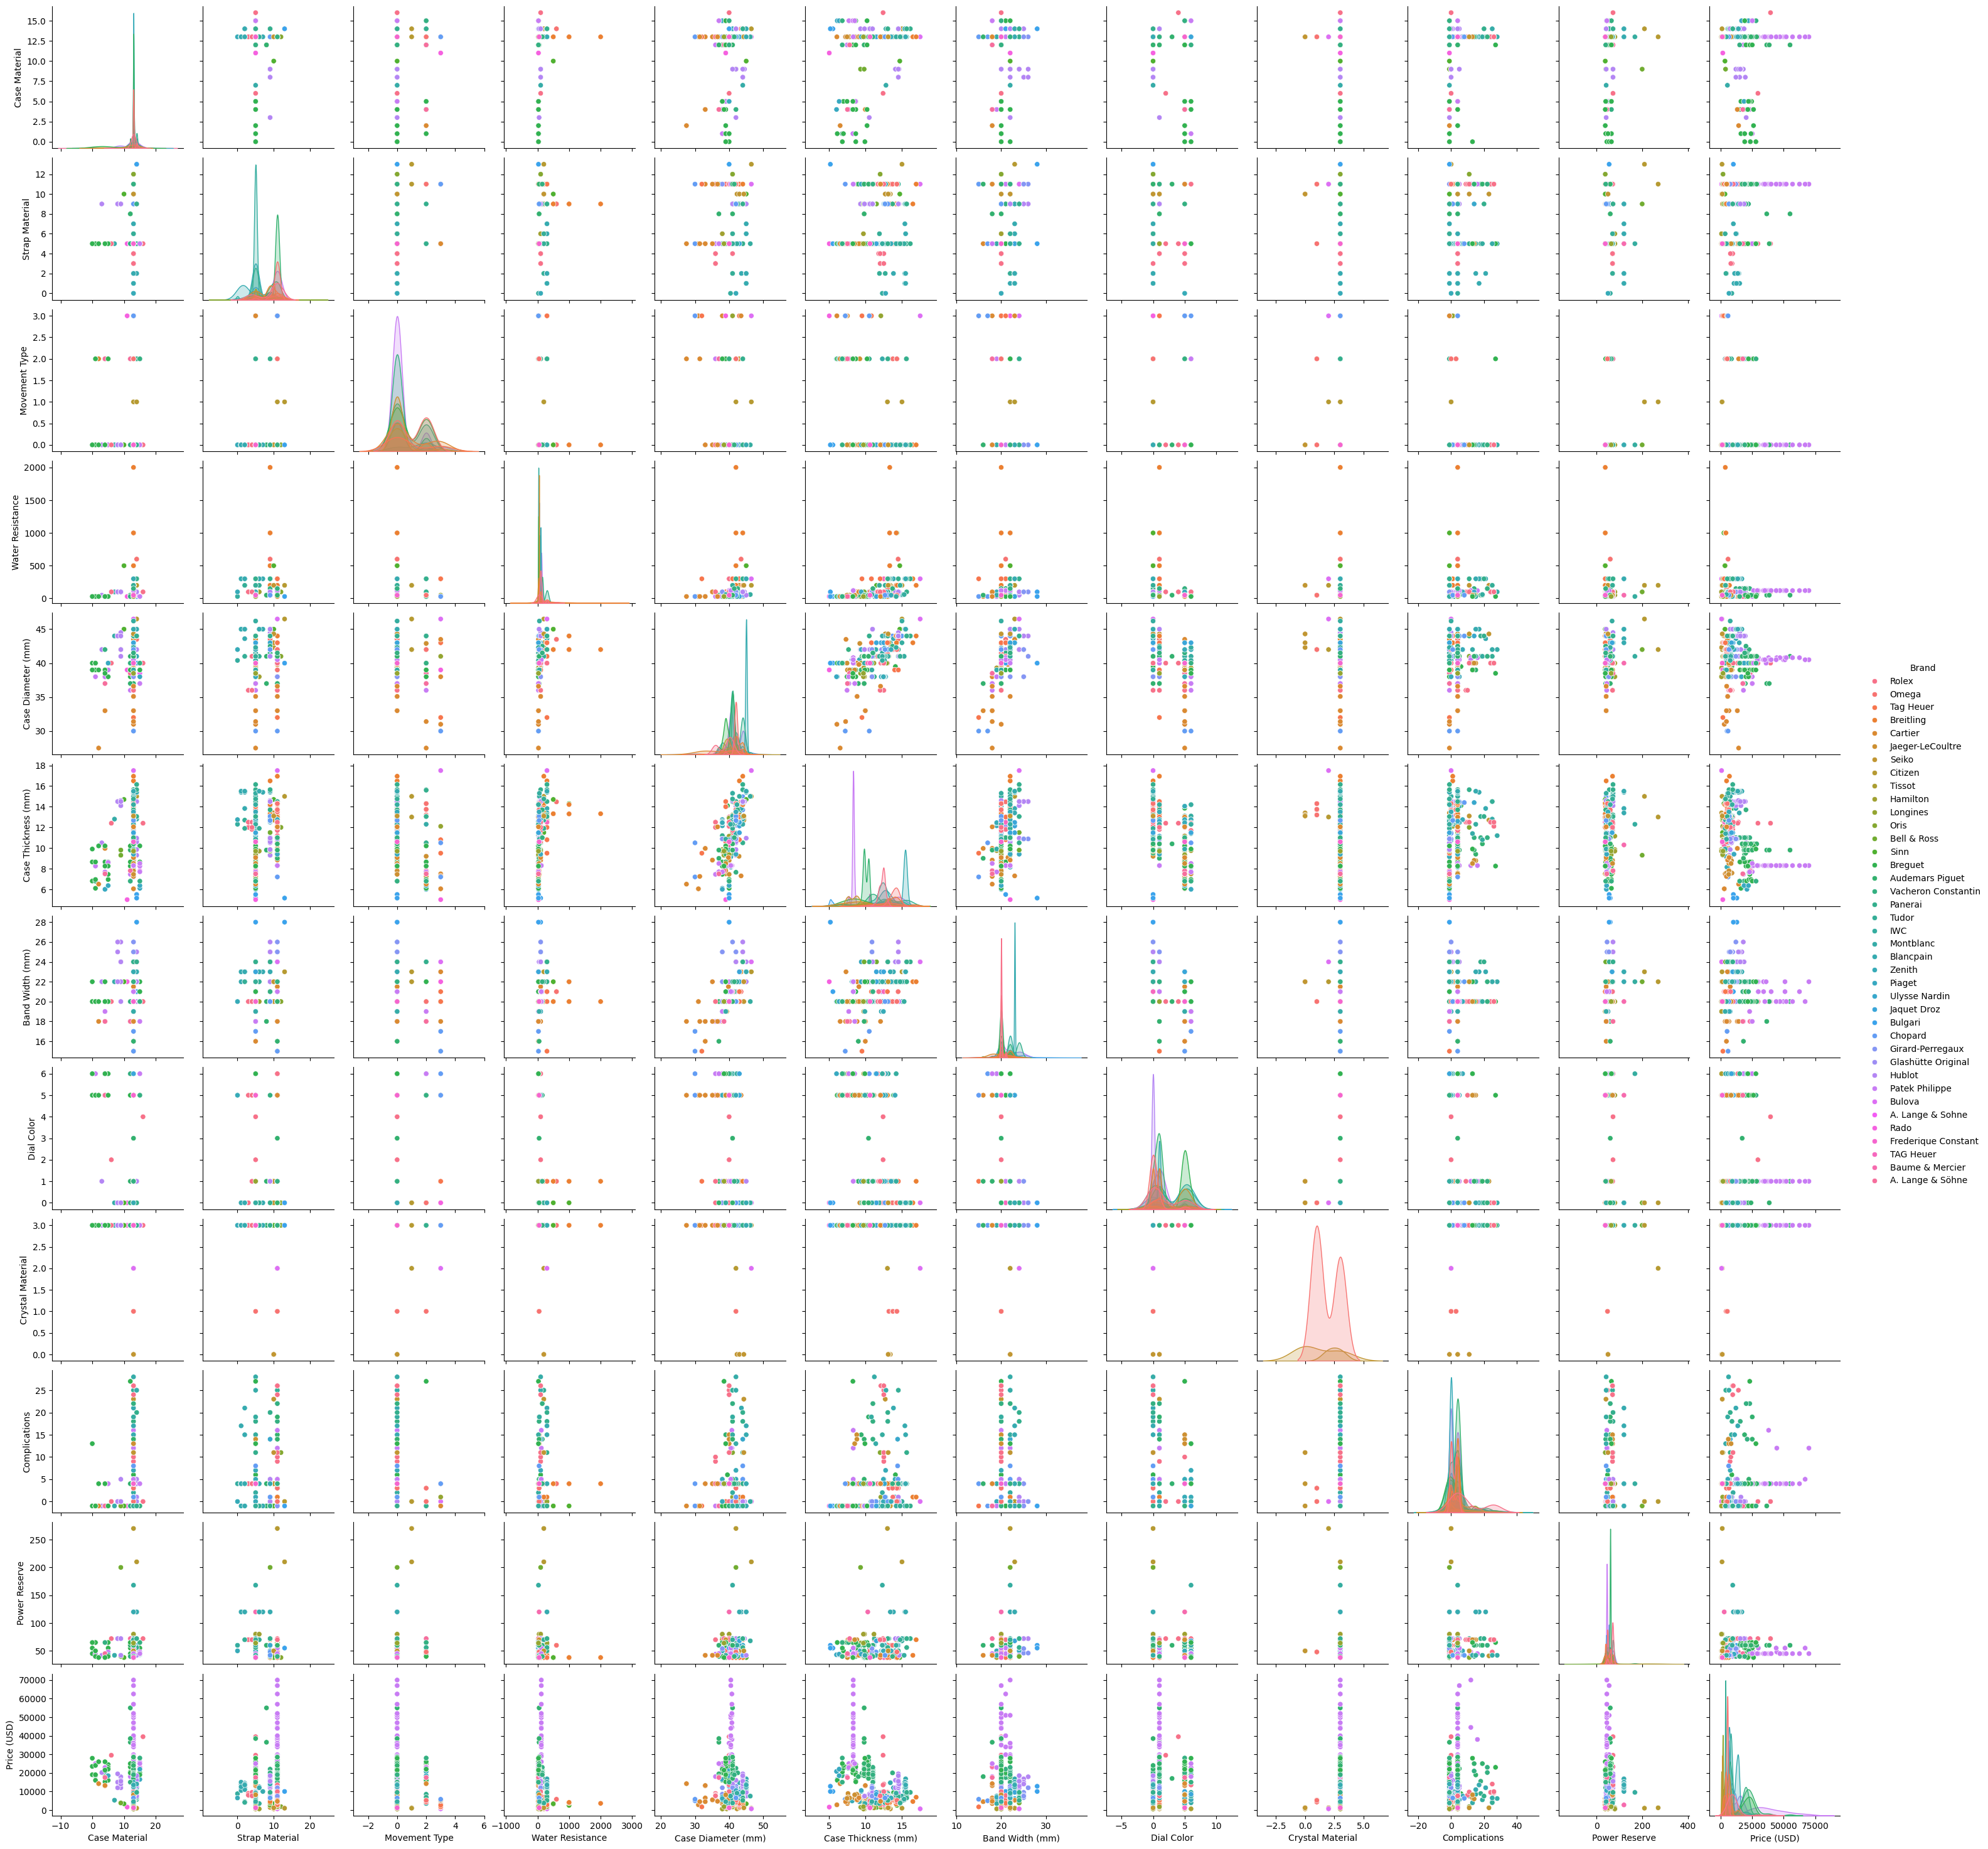

In [266]:
sns.pairplot(df, hue='Brand')

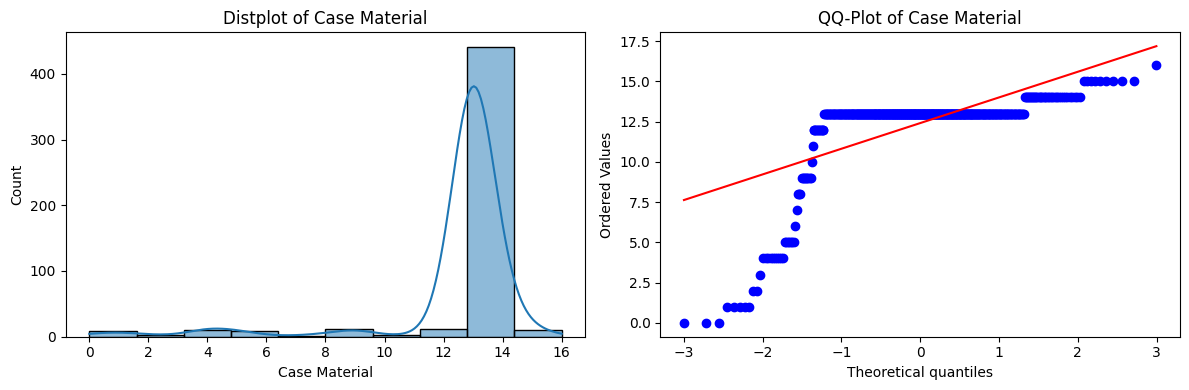

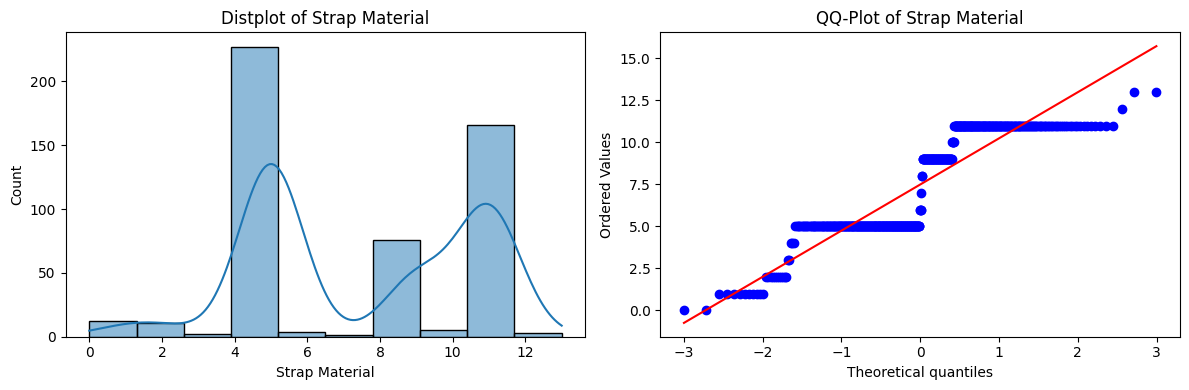

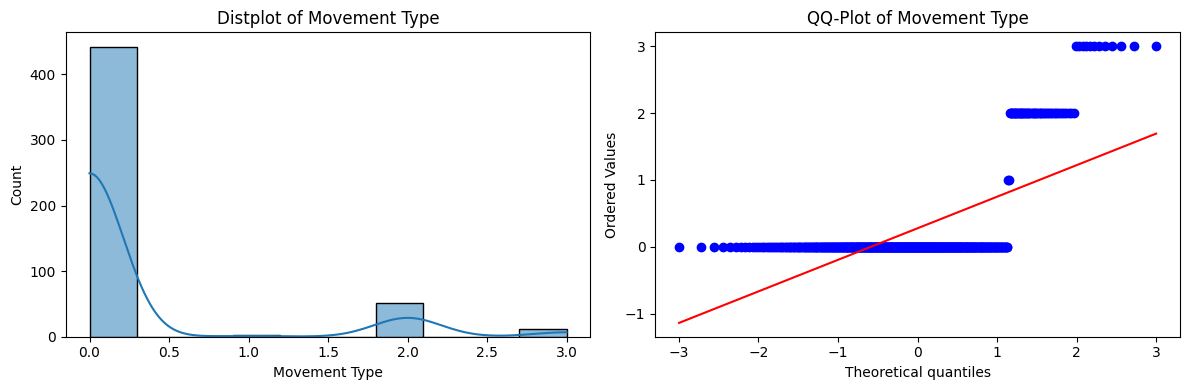

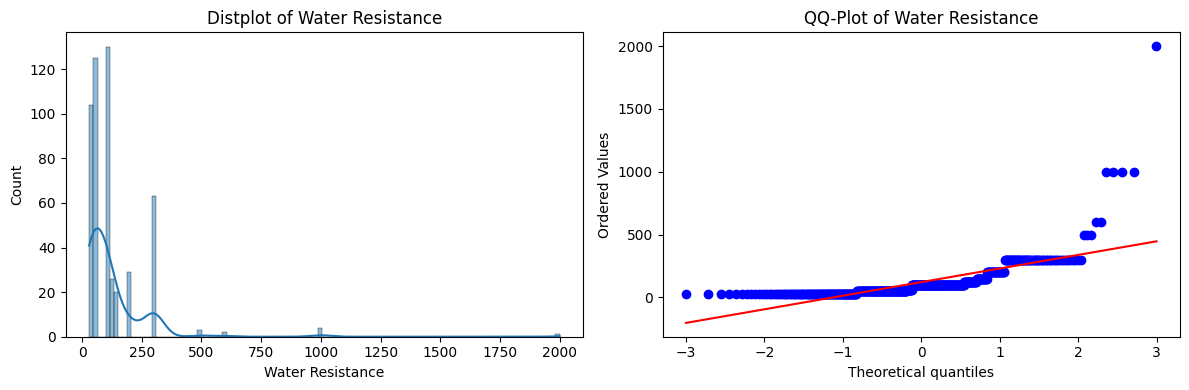

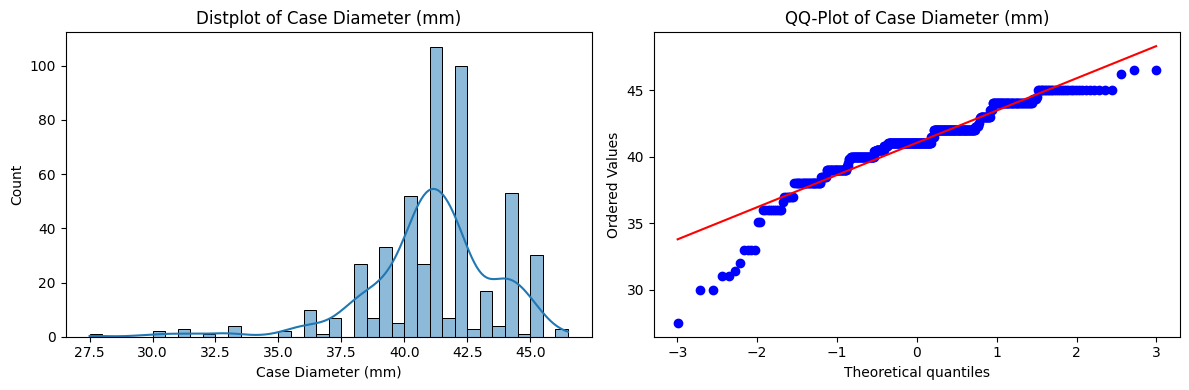

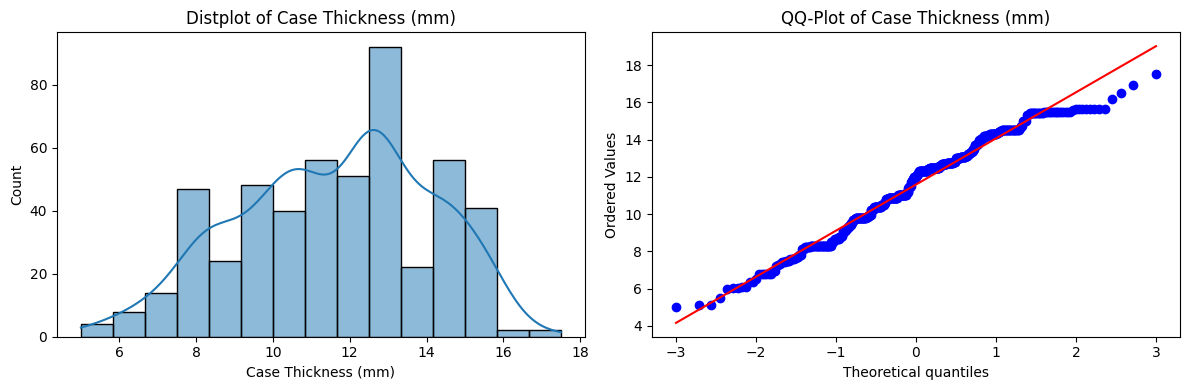

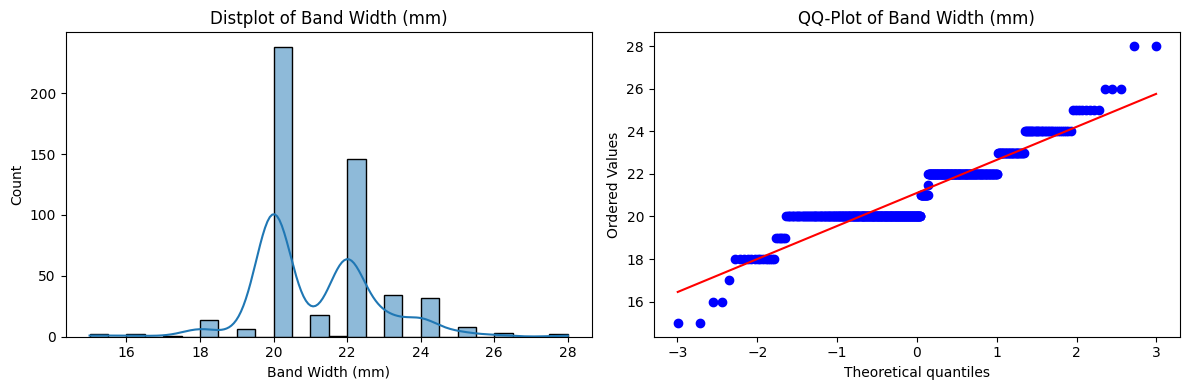

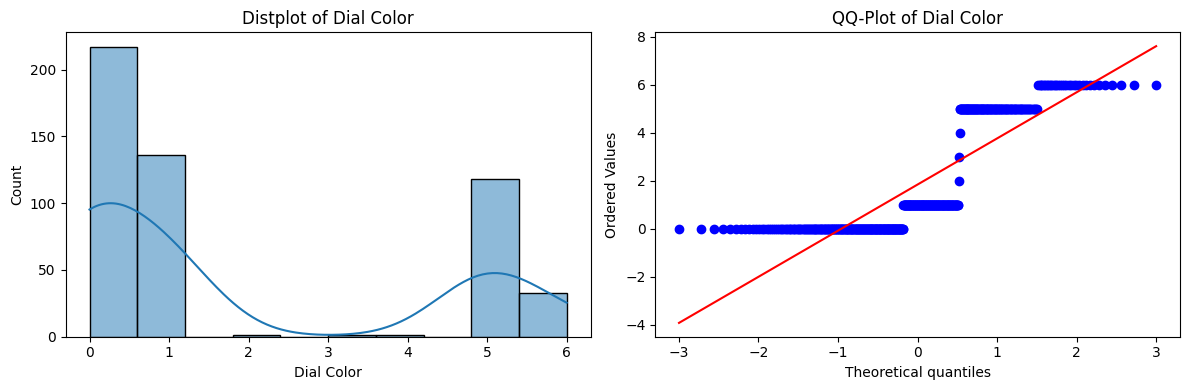

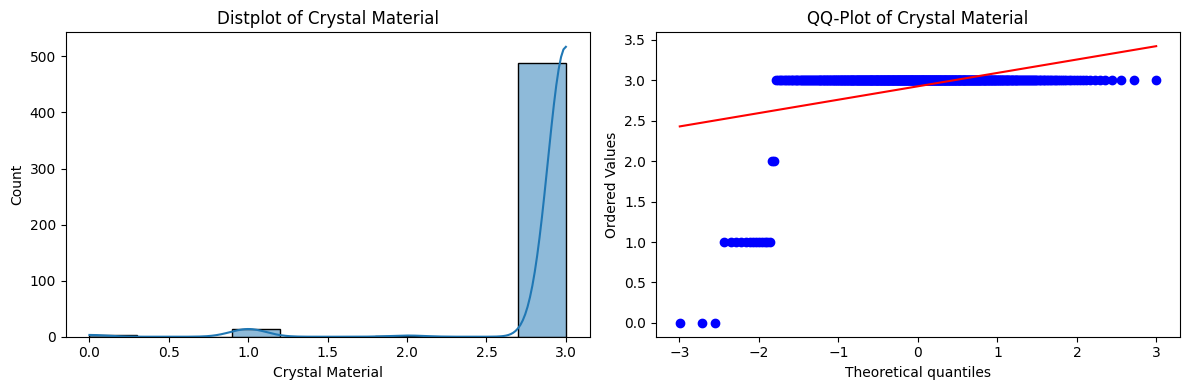

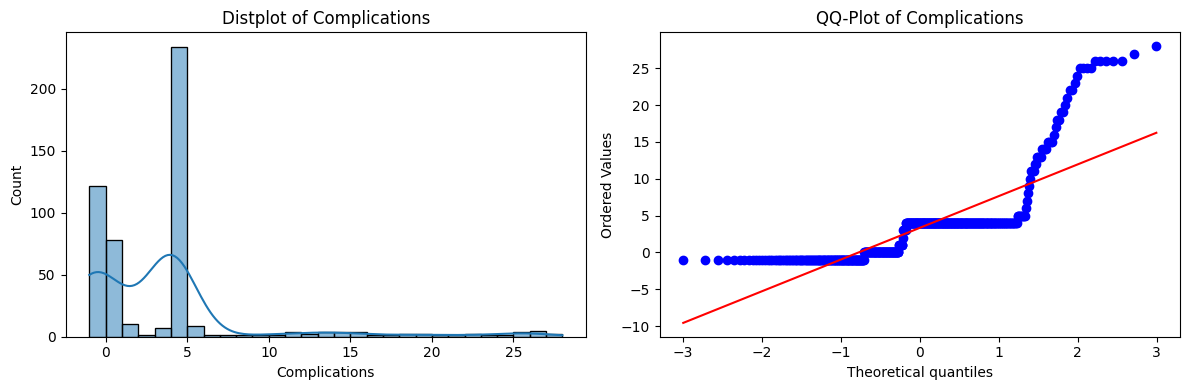

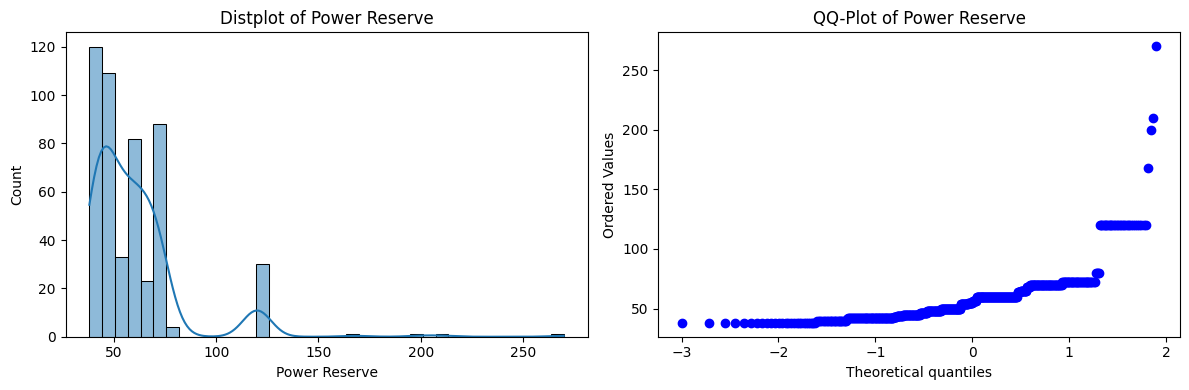

In [267]:
from scipy import stats

# Plot per ogni variabile
for column in df.iloc[:,2:-1].columns:
    plt.figure(figsize=(12, 4))

    # Histplot
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)

    plt.title(f'Distplot of {column}')

    # QQ-plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')

    plt.tight_layout()
    plt.show()

<Axes: ylabel='Brand'>

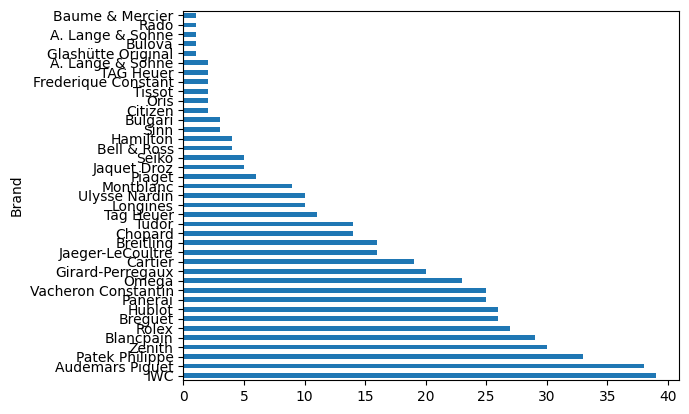

In [268]:
df['Brand'].value_counts().plot(kind='barh')

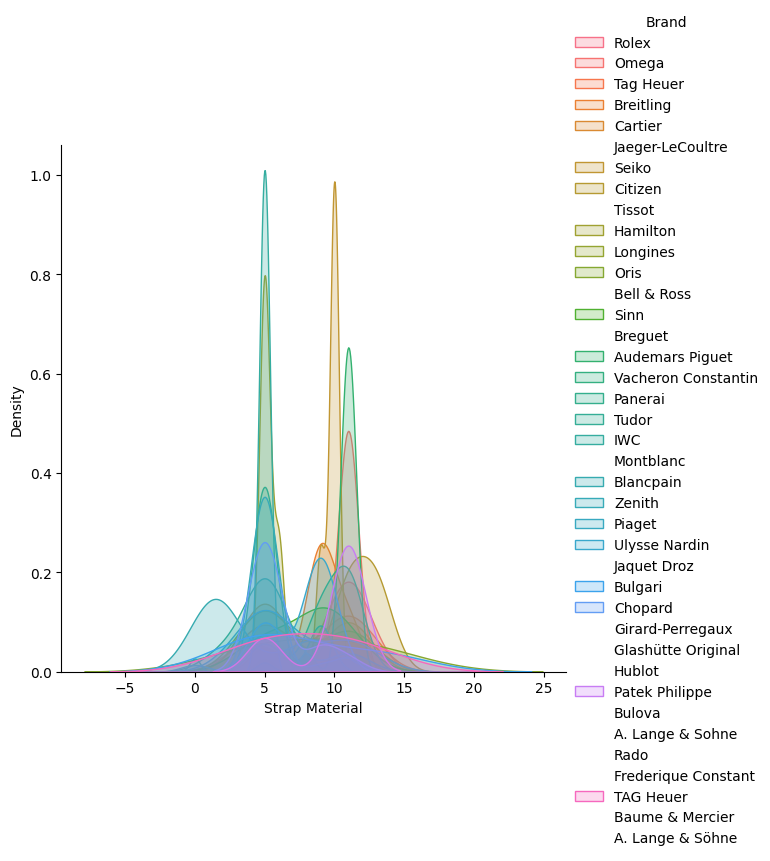

In [269]:
sns.FacetGrid(df, hue="Brand", height=6,).map(sns.kdeplot, "Strap Material",fill=True).add_legend()

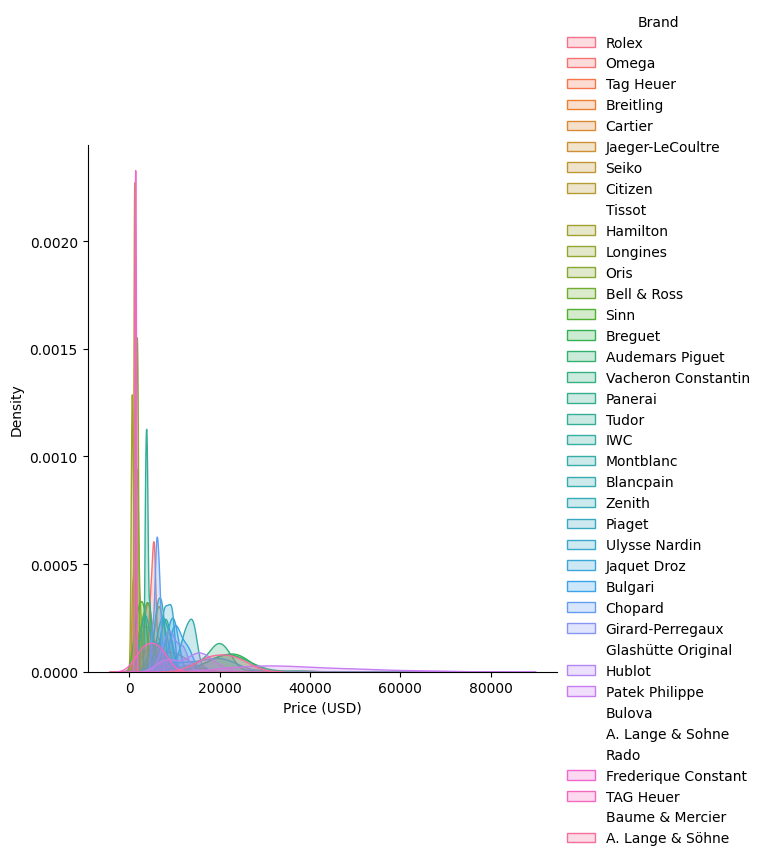

In [270]:
sns.FacetGrid(df, hue="Brand", height=6,).map(sns.kdeplot, "Price (USD)",fill=True).add_legend()

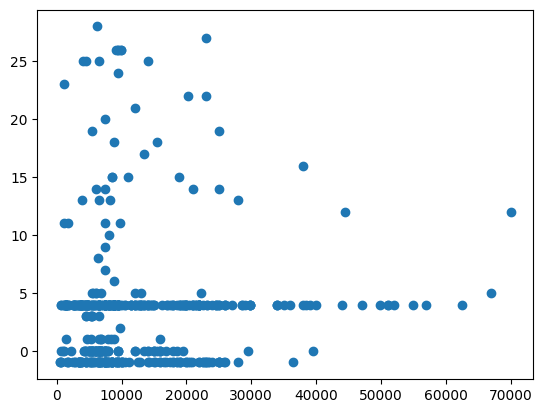

In [271]:
plt.scatter(df['Price (USD)'], df['Complications'])